# 1 - Imports, Filtragem e Tratamento de Dados Faltantes

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [188]:
geralano=pd.read_excel('cancer.xlsx','pen_pros_tes_ma')
geralidade=pd.read_excel('cancer.xlsx','cancer_idade')
geralcor=pd.read_excel('cancer.xlsx','cancer_cor')
geralescolaridade=pd.read_excel('cancer.xlsx','cancer_escolaridade')
penisano=pd.read_excel('cancer.xlsx','penis ano')
penisidade=pd.read_excel('cancer.xlsx','penis idade')
peniscor=pd.read_excel('cancer.xlsx','penis cor')
penisescolaridade=pd.read_excel('cancer.xlsx','penis escolaridade')
cancerestados=pd.read_excel('cancer.xlsx','cancer estados')
cancernordeste=pd.read_excel('cancer.xlsx','cancer nordeste')
penisestados=pd.read_excel('cancer.xlsx','penis estados')
penisnordeste=pd.read_excel('cancer.xlsx','penis nordeste')
dataset=[geralano,geralidade,geralcor,geralescolaridade,penisano,penisidade,peniscor,penisescolaridade,cancerestados,cancernordeste,penisestados,penisnordeste]
dataset2=[geralano,geralidade,geralcor,geralescolaridade,penisano,penisidade,peniscor,penisescolaridade]
dataset3=[cancerestados,cancernordeste,penisestados,penisnordeste]
for i in dataset:
    i.replace(to_replace='-',value=0,inplace=True)
    i.fillna(0,inplace=True)
for i in dataset2:
    i.set_index('Município',inplace=True)
for i in dataset3:
    i.set_index('Unidade da Federação',inplace=True)

# 2 - Data Frame e Plot dos óbitos relacionados a câncer de pênis, testículos e próstata a cada 100.000hab homens no Maranhão de 2011 a 2019

In [86]:
geralano100k=[(geralano[2011]['Total'])*100000/3239669,(geralano[2012]['Total'])*100000/3239669,(geralano[2013]['Total'])*100000/3239669,(geralano[2014]['Total'])*100000/3239669,(geralano[2015]['Total'])*100000/3239669,(geralano[2016]['Total'])*100000/3239669,(geralano[2017]['Total'])*100000/3239669,(geralano[2018]['Total'])*100000/3239669,(geralano[2019]['Total'])*100000/3239669]
geralano100k=pd.DataFrame(geralano100k,columns=['Mortes / 100khab'])
geralano100k.set_axis([2011,2012,2013,2014,2015,2016,2017,2018,2019],inplace=True)
geralano100k.round(2)

,Mortes / 100khab
2011,10.56
2012,10.25
2013,10.96
2014,11.17
2015,11.98
2016,12.72
2017,13.98
2018,12.35
2019,12.87


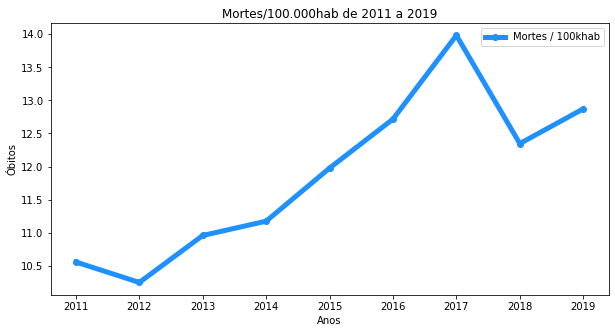

In [292]:
casos100kplot = geralano100k.plot(kind="line",color='dodgerblue',linewidth=5,marker='o')
casos100kplot.set_title('Mortes/100.000hab de 2011 a 2019')
casos100kplot.set_xlabel("Anos")
casos100kplot.set_ylabel("Óbitos")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()
plt.savefig('temp.png', dpi=1000)

### Esse gráfico mostra a tendência de crescimento da taxa de óbitos por câncer de pênis, próstata e testículos no Maranhão. Apesar de se esperar o contrário, haja vista a constante conscientização.




.

# 3 - Data Frame e Plot dos óbitos relacionados a câncer de pênis a cada 100.000hab homens no Maranhão de 2011 a 2019

In [109]:
penisano100k=[(penisano[2011]['Total'])*100000/3239669,(penisano[2012]['Total'])*100000/3239669,(penisano[2013]['Total'])*100000/3239669,(penisano[2014]['Total'])*100000/3239669,(penisano[2015]['Total'])*100000/3239669,(penisano[2016]['Total'])*100000/3239669,(penisano[2017]['Total'])*100000/3239669,(penisano[2018]['Total'])*100000/3239669,(penisano[2019]['Total'])*100000/3239669]
penisano100k=pd.DataFrame(penisano100k,columns=['Mortes / 100khab'])
penisano100k.set_axis([2011,2012,2013,2014,2015,2016,2017,2018,2019],inplace=True)
penisano100k.round(2)

,Mortes / 100khab
2011,0.59
2012,0.71
2013,0.86
2014,0.93
2015,0.46
2016,0.77
2017,0.96
2018,0.59
2019,0.90


TypeError: cannot unpack non-iterable AxesSubplot object

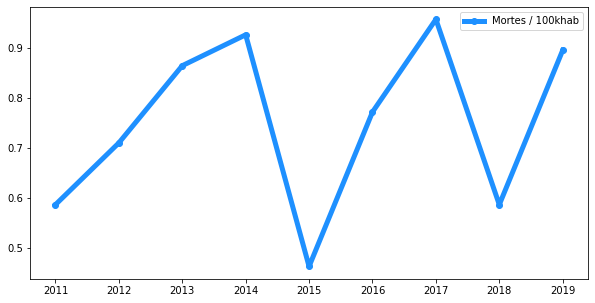

In [291]:
penisano100kplot = penisano100k.plot(kind="line",color='dodgerblue',linewidth=5,marker='o')
penisano100kplot.set_title("Mortes/100.000hab de 2011 a 2019 por câncer de pênis")
penisano100kplot.set_xlabel("Anos")
penisano100kplot.set_ylabel("Óbitos/100.000hab homens")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

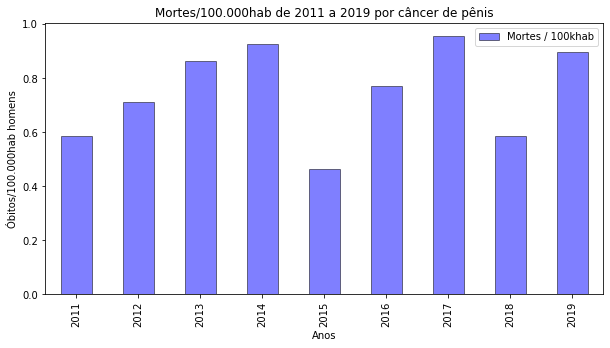

In [206]:
penisano100kplot = penisano100k.plot(kind="bar",color='blue',alpha=0.5,edgecolor='black')
penisano100kplot.set_title("Mortes/100.000hab de 2011 a 2019 por câncer de pênis")
penisano100kplot.set_xlabel("Anos")
penisano100kplot.set_ylabel("Óbitos/100.000hab homens")
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

### Esse gráfico mostra a variação da taxa de óbitos somente por câncer de pênis no Maranhão, mostrando uma queda significativa em 2015, seguida de um crescimento.


.


# 4 - Data Frame com as cidades maranhenses com maior número de mortes por câncer em regiões íntimas, seguido da cidade com maior número de mortes por câncer de pênis, a cada ano.

In [150]:
cap1,cap2,cap3,cap4,cap5,cap6,cap7,cap8,cap9=[],[],[],[],[],[],[],[],[]
mortesano=[geralano,penisano]
for i in mortesano:
    cap1.append(i.drop(labels='Total', axis=0).loc[i.drop(labels='Total', axis=0)[2011]==i.drop(labels='Total', axis=0)[2011].max()])
    cap2.append(i.drop(labels='Total', axis=0).loc[i.drop(labels='Total', axis=0)[2012]==i.drop(labels='Total', axis=0)[2012].max()])
    cap3.append(i.drop(labels='Total', axis=0).loc[i.drop(labels='Total', axis=0)[2013]==i.drop(labels='Total', axis=0)[2013].max()])
    cap4.append(i.drop(labels='Total', axis=0).loc[i.drop(labels='Total', axis=0)[2014]==i.drop(labels='Total', axis=0)[2014].max()])
    cap5.append(i.drop(labels='Total', axis=0).loc[i.drop(labels='Total', axis=0)[2015]==i.drop(labels='Total', axis=0)[2015].max()])
    cap6.append(i.drop(labels='Total', axis=0).loc[i.drop(labels='Total', axis=0)[2016]==i.drop(labels='Total', axis=0)[2016].max()])
    cap7.append(i.drop(labels='Total', axis=0).loc[i.drop(labels='Total', axis=0)[2017]==i.drop(labels='Total', axis=0)[2017].max()])
    cap8.append(i.drop(labels='Total', axis=0).loc[i.drop(labels='Total', axis=0)[2018]==i.drop(labels='Total', axis=0)[2018].max()]) 
    cap9.append(i.drop(labels='Total', axis=0).loc[i.drop(labels='Total', axis=0)[2019]==i.drop(labels='Total', axis=0)[2019].max()]) 
topmortes2011=pd.concat([cap1[0],cap1[1]])[[2011]]
topmortes2012=pd.concat([cap2[0],cap2[1]])[[2012]]
topmortes2013=pd.concat([cap3[0],cap3[1]])[[2013]]
topmortes2014=pd.concat([cap4[0],cap4[1]])[[2014]]
topmortes2015=pd.concat([cap5[0],cap5[1]])[[2015]]
topmortes2016=pd.concat([cap6[0],cap6[1]])[[2016]]
topmortes2017=pd.concat([cap7[0],cap7[1]])[[2017]]
topmortes2018=pd.concat([cap8[0],cap8[1]])[[2018]]
topmortes2019=pd.concat([cap9[0],cap9[1]])[[2019]]

In [160]:
a=topmortes2019.append([topmortes2018]).append([topmortes2017]).append([topmortes2016]).append([topmortes2015]).append([topmortes2014]).append([topmortes2013]).append([topmortes2012]).append([topmortes2011]).fillna('-')
a

,2011,2012,2013,2014,2015,2016,2017,2018,2019
211130 São Luís,-,-,-,-,-,-,-,-,67
210750 Paço do Lumiar,-,-,-,-,-,-,-,-,2
211130 São Luís,-,-,-,-,-,-,-,-,2
211280 Viana,-,-,-,-,-,-,-,-,2
211130 São Luís,-,-,-,-,-,-,-,58,-
211120 São José de Ribamar,-,-,-,-,-,-,-,3,-
211130 São Luís,-,-,-,-,-,-,79,-,-
211130 São Luís,-,-,-,-,-,-,3,-,-
211130 São Luís,-,-,-,-,-,68,-,-,-
211130 São Luís,-,-,-,-,-,5,-,-,-


### Muito trabalho pra explicar, e nem vai servir pra muita coisa...


.

# 5 - Plots da taxa de óbitos a cada 100.000hab relacionados à câncer de pênis, próstata e testículos nos estados brasileiros.

In [196]:
cancerestados['casos100k']=((cancerestados['Total']/9)*100000)/cancerestados['Populacao Masc']
penisestados['casos100k']=((penisestados['Total']/9)*100000)/penisestados['Populacao Masc']
penisano['casos100k']=((penisano['Total']/9)*100000)/penisano['Total de homens']

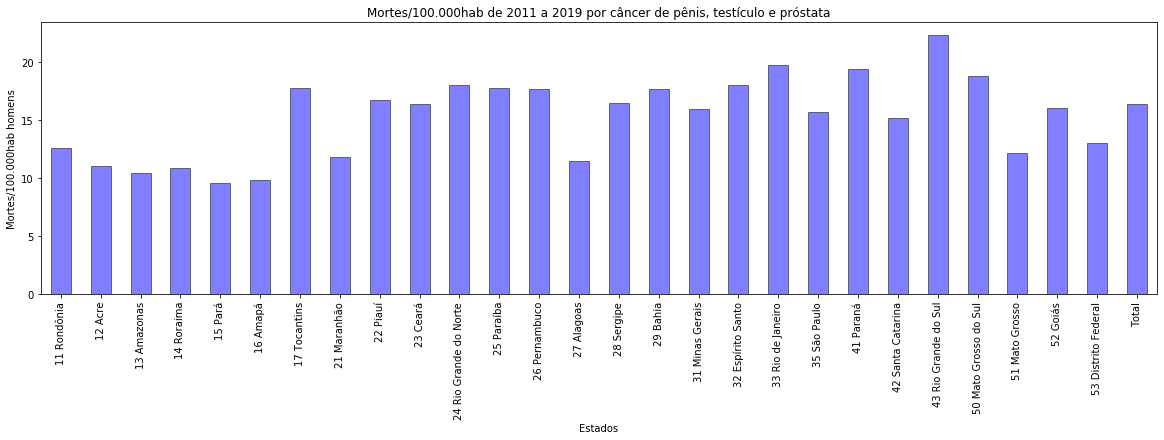

In [217]:
cancerestados100kplot = cancerestados['casos100k'].plot(kind="bar",color='blue',alpha=0.5,edgecolor = 'black')
cancerestados100kplot.set_title("Mortes/100.000hab de 2011 a 2019 por câncer de pênis, testículo e próstata")
cancerestados100kplot.set_xlabel("Estados")
cancerestados100kplot.set_ylabel("Mortes/100.000hab homens")

plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

### Esse gráfico mostra que, tratando-se de um grupo mais geral de câncer, o Maranhão não apresenta índices tão altos, se comparado a outros estados


.

In [263]:
penisestados

,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total,Populacao Masc,casos100k
Unidade da Federação,,,,,,,,,,,,
11 Rondônia,1.0,5.0,2.0,2.0,1.0,1.0,9.0,7.0,4.0,32.0,793224.0,0.448241
12 Acre,2.0,3.0,2.0,1.0,1.0,2.0,2.0,2.0,3.0,18.0,367864.0,0.543679
13 Amazonas,6.0,7.0,7.0,6.0,9.0,14.0,8.0,6.0,6.0,69.0,1751328.0,0.437763
14 Roraima,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,2.0,8.0,229343.0,0.387581
15 Pará,12.0,16.0,20.0,24.0,27.0,27.0,23.0,23.0,22.0,194.0,3825245.0,0.563508
16 Amapá,1.0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,0.0,10.0,334674.0,0.331998
17 Tocantins,10.0,4.0,6.0,7.0,4.0,4.0,6.0,3.0,3.0,47.0,702451.0,0.743429
21 Maranhão,19.0,23.0,28.0,30.0,15.0,25.0,31.0,19.0,29.0,219.0,3258860.0,0.746682
22 Piauí,16.0,8.0,13.0,10.0,11.0,11.0,16.0,10.0,8.0,103.0,1528796.0,0.748592


### O Data Frame acima mostra os índices de óbitos SOMENTE DE CÂNCER DE PÊNIS para os estados brasileiros, baseado na população masculina.

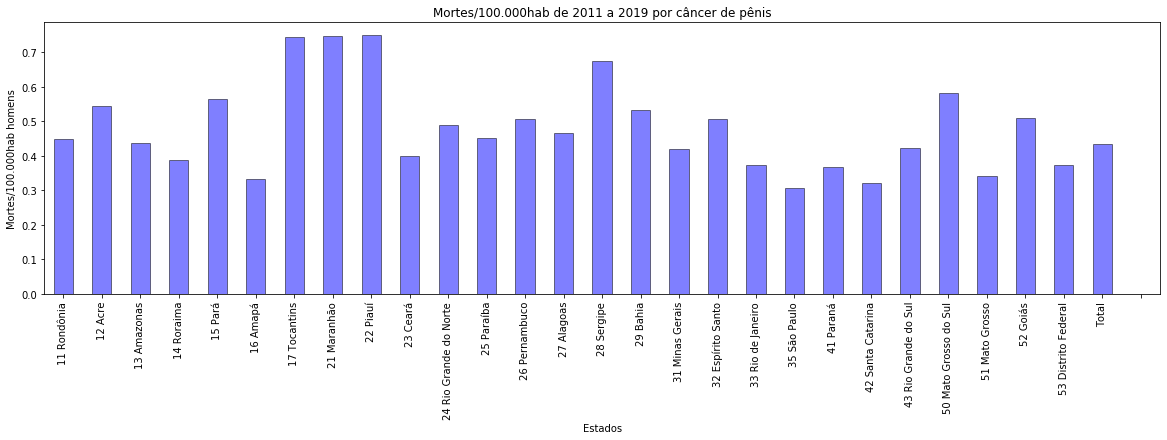

In [193]:
penisestados100kplot = penisestados['casos100k'].plot(kind="bar",color='blue',alpha=0.5,edgecolor = 'black')
penisestados100kplot.set_title("Mortes/100.000hab de 2011 a 2019 por câncer de pênis")
penisestados100kplot.set_xlabel("Estados")
penisestados100kplot.set_ylabel("Mortes/100.000hab homens")

plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

### O plot mostra que, quando se trata somente dos índices de óbitos voltados pra câncer de pênis, o Maranhão ocupa o segundo lugar com maior índice, perdendo apenas para o Piauí, que é um estado vizinho.


.

# 6 - Óbitos de 2011 a 2019 classificados por idade

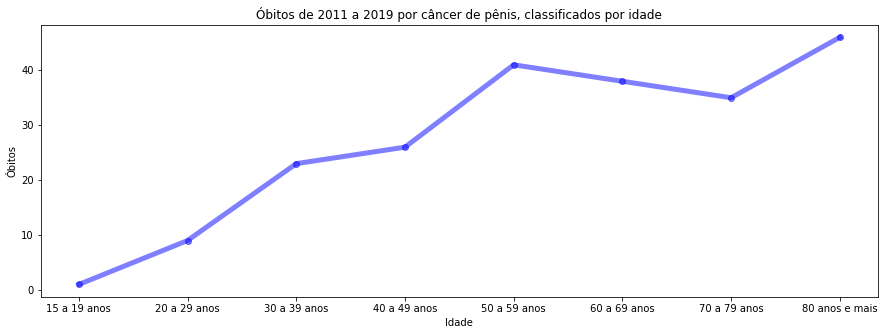

In [226]:
penisidadeplot = penisidade.drop(columns=['Total','Total de homens']).loc['Total'].plot(kind="line",color='blue',alpha=0.5,linewidth=5,marker='o')
penisidadeplot.set_title("Óbitos de 2011 a 2019 por câncer de pênis, classificados por idade")
penisidadeplot.set_xlabel("Idade")
penisidadeplot.set_ylabel("Óbitos")
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

### O gráfico acima expressa qual a faixa etária que apresenta mais mortes relacionadas ao câncer de pênis, dando destaque para a população com 50+ anos


.

# 7 - Pie Plot das raças mais afetadas pelo câncer de pênis

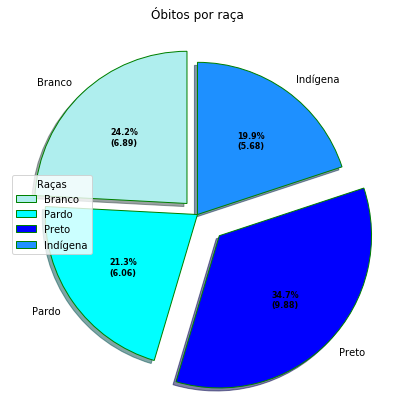

In [285]:
popracasmahomem=[697096,2179328,334124,17607]
racas=['Branco', 'Pardo', 'Preto','Indígena']
taxapeniscor= [peniscor['Branca']['Total']*100000/697096,peniscor['Parda']['Total']*100000/2179328,peniscor['Preta']['Total']*100000/334124,peniscor['Indígena']['Total']*100000/17607]
explode = (0.1, 0.0, 0.2, 0.0)
colors = ( "paleturquoise", "cyan", "blue","dodgerblue")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
    absolute = float(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:.2f})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(taxapeniscor, 
                                  autopct = lambda pct: func(pct, taxapeniscor),
                                  explode = explode, 
                                  labels = racas,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, racas,title ="Raças",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Óbitos por raça")
plt.show()
fig.savefig('temp.png', dpi=1000)

### Esse gráfico lindo (e que deu um trabalho lindo tbm) expressa quais raças são mais afetadas pelos óbitos por câncer de pênis, mostrando que pessoas de cor preta são mais propensas a adquirir a doença.


.

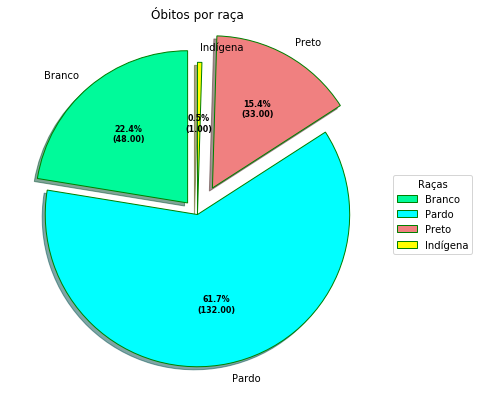

In [278]:
popracasmahomem=[697096,2179328,334124,17607]
racas=['Branco', 'Pardo', 'Preto','Indígena']
taxapeniscor= [peniscor['Branca']['Total'],peniscor['Parda']['Total'],peniscor['Preta']['Total'],peniscor['Indígena']['Total']]
explode = (0.1, 0.0, 0.2, 0.0)
colors = ( "mediumspringgreen", "cyan", "lightcoral","yellow")
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
def func(pct, allvalues):
    absolute = float(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:.2f})".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(taxapeniscor, 
                                  autopct = lambda pct: func(pct, taxapeniscor),
                                  explode = explode, 
                                  labels = racas,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, racas,title ="Raças",loc ="center left",bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Óbitos por raça")
plt.show()

### Esse Data Frame mostra o total de mortes por câncer de pênis no estado do Maranhão nos últimos 9 anos

In [277]:
penisestados.round(4).to_csv('./penisestado.csv',index=True, sep = ';',encoding=('utf-8-sig'))